# Conectamos con drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Instalamos las dependencias

In [ ]:
!apt install gdal-bin python-gdal python3-gdal
!apt install python3-rtree
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes
!pip install matplotlib==3.1.1
!pip install osmnx

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 0s (14.1 MB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 160815 files and directories currently installed.)
Preparing to unpack .../python3-numpy_1

     |████████████████████████████████| 102kB 6.6MB/s 
     |████████████████████████████████| 71kB 6.8MB/s 
     |████████████████████████████████| 10.3MB 22.7MB/s 
     |████████████████████████████████| 1.0MB 25.7MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.26.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1
  Found existing installation: Rtree 0.8.3
    Uninstalling Rtree-0.8.3:
      Successfully uninstalled Rtree-0.8.3


# Importamos las librerías y seteamos la raíz del directorio

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import osmnx as ox
import networkx as nx
from IPython.display import display
import numpy as np

In [ ]:
ROOT = "drive/Shareddrives/IIC2115 - 2021-1/Pautas/02 Actividades/A5/Datos"

# Misión 0

In [ ]:
# gpd.read_file(f"{ROOT}/PO 02-03-2020 Paradas SerFrec/Shp/Shp/Paradas 020320.shp")
df = pd.read_csv(f"{ROOT}/DistritosRM.csv")
distritos = gpd.read_file(f"{ROOT}/geoDistritosRM/geoDistritosRM.shp")
paradas = gpd.read_file(f"{ROOT}/PO 02-03-2020 Paradas SerFrec/Shp/Shp/Paradas 020320.shp")

In [ ]:
display(df.head())
display(distritos.head())
display(paradas.head())

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,903.0,228.0,2741.0,1166659.89,23.49,21.10
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,1310103.0,38.0,389.0,956.0,891.0,113.0,2387.0,509080.85,46.89,12.00
3,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Brasil,1310104.0,52.0,657.0,1728.0,2202.0,423.0,5062.0,761738.52,66.45,10.25
4,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Chacabuco,1310105.0,45.0,643.0,1092.0,974.0,145.0,2899.0,765782.74,37.86,11.87


,CODIGO,geometry
0,1310101.0,"POLYGON ((346775.511 6299463.724, 346788.392 6..."
1,1310102.0,"POLYGON ((345880.280 6299633.958, 345961.610 6..."
2,1310103.0,"POLYGON ((345546.017 6299748.840, 345650.511 6..."
3,1310104.0,"POLYGON ((344856.320 6298892.632, 345672.277 6..."
4,1310105.0,"POLYGON ((343856.526 6298225.435, 344041.982 6..."


,ID,CODINFRA,SIMT,COMUNA,EJE,DESDECRUCE,HACIACRUCE,NOMBRE_PAR,X,Y,N_ET,N_ZP,ZPHORARIO,FREPMA,PLAZASPMA,FREPTA,PLAZASPTA,NSERVICIOS,SERVICIOS,geometry
0,917,L-13-63-5-NS,PI317,MAIPÚ,MAIPÚ,CALETERA CAMINO A MELIPILLA,LAGO BRACCIANO,Central Poniente / esq. Lago Bracciano,333352.2096,6.285793e+06,0,NaN,None,27.5,2482.0,31.000000,2856.333333,6,111I;113R;113eR;113cR;350R;I11R,POINT (333352.210 6285793.364)
1,918,L-13-63-10-PO,PI307,MAIPÚ,MAIPÚ,LAS ARALIAS,LAGO DE COMO,Central Poniente / esq. Lago de Como,333556.9557,6.285602e+06,0,NaN,None,27.5,2482.0,31.000000,2856.333333,6,111I;113R;113eR;113cR;350R;I11R,POINT (333556.956 6285602.347)
2,941,L-13-61-10-OP,PI269,MAIPÚ,MAIPÚ,LIQUIDAMBAR 4,LAGO DE COMO,Central Oriente / esq. Lago de Como,333620.3706,6.285625e+06,0,NaN,None,35.0,3264.0,22.666667,2008.333333,6,111R;113I;113eI;113cI;350I;I11I,POINT (333620.371 6285624.741)
3,920,L-13-63-20-PO,PI309,MAIPÚ,MAIPÚ,EL CACTUS,LAGO CASTELGANDOLFO,Central Poniente / esq. Castelgandolfo,334004.8629,6.285199e+06,0,NaN,None,27.5,2482.0,31.000000,2856.333333,6,111I;113R;113eR;113cR;350R;I11R,POINT (334004.863 6285199.223)
4,939,L-13-61-20-OP,PI267,MAIPÚ,MAIPÚ,EL HELECHO NORTE,LAGO CASTELGANDOLFO,Central Oriente / esq. Castelgandolfo,334032.7925,6.285254e+06,0,NaN,None,35.0,3264.0,22.666667,2008.333333,6,111R;113I;113eI;113cI;350I;I11I,POINT (334032.792 6285254.391)


In [ ]:
df = df.merge(distritos, on='CODIGO')

In [ ]:
df = gpd.GeoDataFrame(df, geometry='geometry', crs='EPSG:32719')

In [ ]:
df.head()

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6..."
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,903.0,228.0,2741.0,1166659.89,23.49,21.10,"POLYGON ((345880.280 6299633.958, 345961.610 6..."
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,1310103.0,38.0,389.0,956.0,891.0,113.0,2387.0,509080.85,46.89,12.00,"POLYGON ((345546.017 6299748.840, 345650.511 6..."
3,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Brasil,1310104.0,52.0,657.0,1728.0,2202.0,423.0,5062.0,761738.52,66.45,10.25,"POLYGON ((344856.320 6298892.632, 345672.277 6..."
4,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Chacabuco,1310105.0,45.0,643.0,1092.0,974.0,145.0,2899.0,765782.74,37.86,11.87,"POLYGON ((343856.526 6298225.435, 344041.982 6..."


# Misión 1

In [ ]:
df.head()

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6..."
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,903.0,228.0,2741.0,1166659.89,23.49,21.10,"POLYGON ((345880.280 6299633.958, 345961.610 6..."
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,1310103.0,38.0,389.0,956.0,891.0,113.0,2387.0,509080.85,46.89,12.00,"POLYGON ((345546.017 6299748.840, 345650.511 6..."
3,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Brasil,1310104.0,52.0,657.0,1728.0,2202.0,423.0,5062.0,761738.52,66.45,10.25,"POLYGON ((344856.320 6298892.632, 345672.277 6..."
4,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Chacabuco,1310105.0,45.0,643.0,1092.0,974.0,145.0,2899.0,765782.74,37.86,11.87,"POLYGON ((343856.526 6298225.435, 344041.982 6..."


In [ ]:
paradas.head()

,ID,CODINFRA,SIMT,COMUNA,EJE,DESDECRUCE,HACIACRUCE,NOMBRE_PAR,X,Y,N_ET,N_ZP,ZPHORARIO,FREPMA,PLAZASPMA,FREPTA,PLAZASPTA,NSERVICIOS,SERVICIOS,geometry
0,917,L-13-63-5-NS,PI317,MAIPÚ,MAIPÚ,CALETERA CAMINO A MELIPILLA,LAGO BRACCIANO,Central Poniente / esq. Lago Bracciano,333352.2096,6.285793e+06,0,NaN,None,27.5,2482.0,31.000000,2856.333333,6,111I;113R;113eR;113cR;350R;I11R,POINT (333352.210 6285793.364)
1,918,L-13-63-10-PO,PI307,MAIPÚ,MAIPÚ,LAS ARALIAS,LAGO DE COMO,Central Poniente / esq. Lago de Como,333556.9557,6.285602e+06,0,NaN,None,27.5,2482.0,31.000000,2856.333333,6,111I;113R;113eR;113cR;350R;I11R,POINT (333556.956 6285602.347)
2,941,L-13-61-10-OP,PI269,MAIPÚ,MAIPÚ,LIQUIDAMBAR 4,LAGO DE COMO,Central Oriente / esq. Lago de Como,333620.3706,6.285625e+06,0,NaN,None,35.0,3264.0,22.666667,2008.333333,6,111R;113I;113eI;113cI;350I;I11I,POINT (333620.371 6285624.741)
3,920,L-13-63-20-PO,PI309,MAIPÚ,MAIPÚ,EL CACTUS,LAGO CASTELGANDOLFO,Central Poniente / esq. Castelgandolfo,334004.8629,6.285199e+06,0,NaN,None,27.5,2482.0,31.000000,2856.333333,6,111I;113R;113eR;113cR;350R;I11R,POINT (334004.863 6285199.223)
4,939,L-13-61-20-OP,PI267,MAIPÚ,MAIPÚ,EL HELECHO NORTE,LAGO CASTELGANDOLFO,Central Oriente / esq. Castelgandolfo,334032.7925,6.285254e+06,0,NaN,None,35.0,3264.0,22.666667,2008.333333,6,111R;113I;113eI;113cI;350I;I11I,POINT (334032.792 6285254.391)


In [ ]:
dfparada = gpd.sjoin(df, paradas, op='intersects')
dfparada.head()

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry,index_right,ID,CODINFRA,SIMT,COMUNA,EJE,DESDECRUCE,HACIACRUCE,NOMBRE_PAR,X,Y,N_ET,N_ZP,ZPHORARIO,FREPMA,PLAZASPMA,FREPTA,PLAZASPTA,NSERVICIOS,SERVICIOS
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6...",8616,698,E-20-53-OP-10,PA343,SANTIAGO,SANTIAGO,AVENIDA VICUÑA MACKENNA,IRENE MORALES,Parada 10 / Plaza Italia,347898.082928,6.299035e+06,ET03,NaN,None,35.0,4710.0,48.333333,6565.000000,10,106R;401R;405R;419R;421R;423R;481I;432NR;541NR...
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6...",8626,7136,E-20-53-OP-5,PA384,SANTIAGO,SANTIAGO,AVENIDA VICUÑA MACKENNA,IRENE MORALES,Parada 11 / Plaza Italia,347968.953641,6.299059e+06,ET03,NaN,None,20.5,2505.5,17.000000,1924.333333,5,412R;418R;D09NI;514R;515NR
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6...",8618,8475,E-20-192-OP-5,PA393,SANTIAGO,SANTIAGO,AVENIDA VICUÑA MACKENNA,IRENE MORALES,Parada 1 / Plaza Italia,347944.779694,6.299093e+06,ET03,NaN,None,41.0,5051.0,44.000000,5245.666667,6,504R;505R;508R;517R;502cR;B27R
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6...",8575,8469,T-20-192-PO-17,PA334,SANTIAGO,SANTIAGO,MAC IVER,MIRAFLORES,Merced / esq. Miraflores,346990.370000,6.298939e+06,0,NaN,None,52.0,6415.0,36.000000,4135.333333,6,504I;505I;508I;514I;517I;B02NI
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6...",8615,1099,E-20-53-OP-15,PA373,SANTIAGO,SANTIAGO,IRENE MORALES,NAMUR,Parada 9 / Plaza Italia,347824.037786,6.298998e+06,ET03,NaN,None,45.0,5185.0,53.666667,6205.000000,6,116I;303I;303R;406R;407R;426R


In [ ]:
def servicios(x):
    s = set()
    for servicios in map(lambda y: y.split(";"), x["SERVICIOS"]):
        s.update(servicios)
    return len(s), s

In [ ]:
df_servicios = pd.DataFrame(map(lambda x: (x[0], x[1][0], x[1][1]), map(lambda x: (x[0], servicios(x[1])), dfparada.groupby("CODIGO")[["CODIGO", "SERVICIOS"]])), columns=["CODIGO", "NUMSERVICIOS", "SERVICIOS_SET"])

In [ ]:
df_servicios.head()

,CODIGO,NUMSERVICIOS,SERVICIOS_SET
0,1310101.0,96,"{406I, 504I, 210vR, 513I, 210R, 109NR, 422R, 4..."
1,1310102.0,100,"{504I, I14NR, 210vR, 210R, 422R, 301I, 314I, 3..."
2,1310103.0,54,"{513R, 503I, 424R, 406R, 307eR, 504I, I10NR, 4..."
3,1310104.0,52,"{513R, J10I, 424R, 406R, I10NR, 217eR, 516R, I..."
4,1310105.0,85,"{406I, I14NR, J16I, 210vR, 210R, 513I, J05I, 4..."


In [ ]:
dfparada = dfparada.merge(df_servicios, on="CODIGO", how="outer")

In [ ]:
dfparada.head()

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry,index_right,ID,CODINFRA,SIMT,COMUNA,EJE,DESDECRUCE,HACIACRUCE,NOMBRE_PAR,X,Y,N_ET,N_ZP,ZPHORARIO,FREPMA,PLAZASPMA,FREPTA,PLAZASPTA,NSERVICIOS,SERVICIOS,NUMSERVICIOS,SERVICIOS_SET
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6...",8616,698,E-20-53-OP-10,PA343,SANTIAGO,SANTIAGO,AVENIDA VICUÑA MACKENNA,IRENE MORALES,Parada 10 / Plaza Italia,347898.082928,6.299035e+06,ET03,NaN,None,35.0,4710.0,48.333333,6565.000000,10,106R;401R;405R;419R;421R;423R;481I;432NR;541NR...,96,"{406I, 504I, 210vR, 513I, 210R, 109NR, 422R, 4..."
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6...",8626,7136,E-20-53-OP-5,PA384,SANTIAGO,SANTIAGO,AVENIDA VICUÑA MACKENNA,IRENE MORALES,Parada 11 / Plaza Italia,347968.953641,6.299059e+06,ET03,NaN,None,20.5,2505.5,17.000000,1924.333333,5,412R;418R;D09NI;514R;515NR,96,"{406I, 504I, 210vR, 513I, 210R, 109NR, 422R, 4..."
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6...",8618,8475,E-20-192-OP-5,PA393,SANTIAGO,SANTIAGO,AVENIDA VICUÑA MACKENNA,IRENE MORALES,Parada 1 / Plaza Italia,347944.779694,6.299093e+06,ET03,NaN,None,41.0,5051.0,44.000000,5245.666667,6,504R;505R;508R;517R;502cR;B27R,96,"{406I, 504I, 210vR, 513I, 210R, 109NR, 422R, 4..."
3,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6...",8575,8469,T-20-192-PO-17,PA334,SANTIAGO,SANTIAGO,MAC IVER,MIRAFLORES,Merced / esq. Miraflores,346990.370000,6.298939e+06,0,NaN,None,52.0,6415.0,36.000000,4135.333333,6,504I;505I;508I;514I;517I;B02NI,96,"{406I, 504I, 210vR, 513I, 210R, 109NR, 422R, 4..."
4,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6...",8615,1099,E-20-53-OP-15,PA373,SANTIAGO,SANTIAGO,IRENE MORALES,NAMUR,Parada 9 / Plaza Italia,347824.037786,6.298998e+06,ET03,NaN,None,45.0,5185.0,53.666667,6205.000000,6,116I;303I;303R;406R;407R;426R,96,"{406I, 504I, 210vR, 513I, 210R, 109NR, 422R, 4..."


In [ ]:
dfparada["NUMSERVICIOS"]

0        96
1        96
2        96
3        96
4        96
         ..
11297    11
11298    11
11299    11
11300    11
11301    11
Name: NUMSERVICIOS, Length: 11302, dtype: int64

In [ ]:
dfparada["CODIGO"].value_counts()

1320105.0    160
1312406.0    144
1312502.0    121
1312504.0    117
1311501.0    105
            ... 
1310407.0      8
1312710.0      8
1312105.0      6
1330205.0      2
1330204.0      1
Name: CODIGO, Length: 344, dtype: int64

In [ ]:
temp = pd.DataFrame(dfparada["CODIGO"].value_counts())
temp.reset_index(inplace=True)
temp.rename(columns={"CODIGO": "N_PARADAS", "index": "CODIGO"}, inplace=True)
temp.head(5)

,CODIGO,N_PARADAS
0,1320105.0,160
1,1312406.0,144
2,1312502.0,121
3,1312504.0,117
4,1311501.0,105


In [ ]:
dfparada = dfparada.merge(temp, on='CODIGO', how="outer")
dfparada["N_PARADAS"].isnull().sum()

0

In [ ]:
dfparada["N_PARADAS"].fillna(0, inplace=True)
dfparada["N_PARADAS"].isnull().sum()

0

Text(0.5, 1.0, 'Cantidad de servicios por distrito')

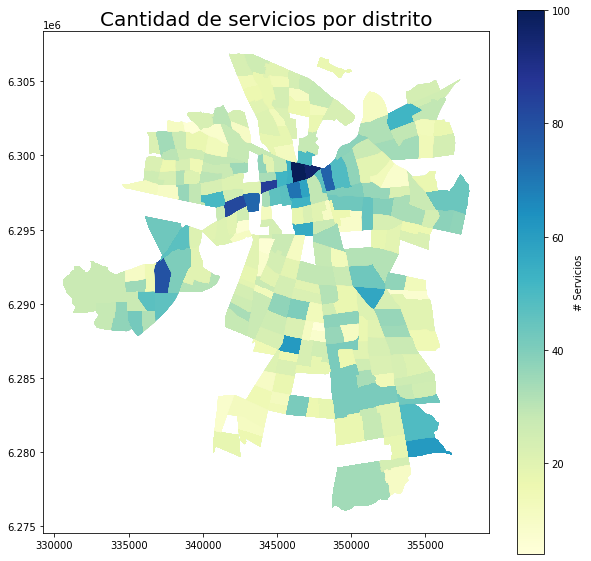

In [ ]:
dfparadafiltrado = dfparada.loc[dfparada["Densidad"] > 15]
dfparadafiltrado.plot(column="NUMSERVICIOS", figsize=(10, 10), legend=True,legend_kwds={"label":"# Servicios"},cmap="YlGnBu")
plt.title("Cantidad de servicios por distrito",size = 20)

# Misión 2

<AxesSubplot:>

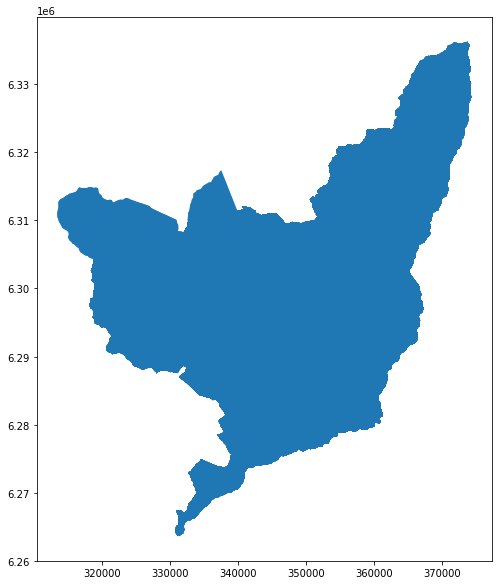

In [ ]:
dfparada_con_paradas = dfparada[dfparada["N_PARADAS"] > 0]
dfparada_con_paradas.plot(figsize=(10,10))

In [ ]:
dfparada_con_paradas.to_crs("EPSG:4326", inplace=True)

<AxesSubplot:>

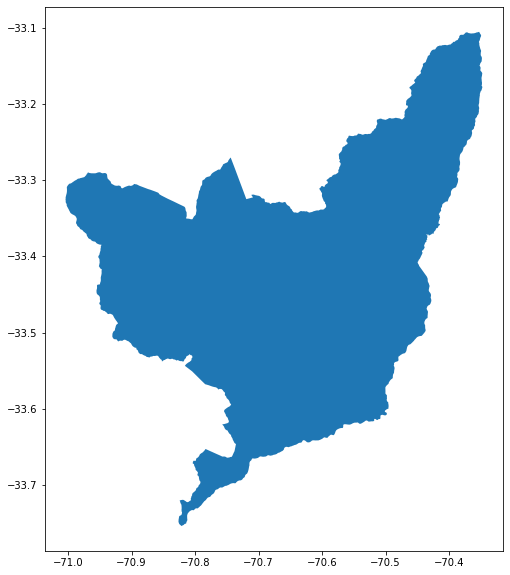

In [ ]:
poligono = dfparada_con_paradas.dissolve(by="NOM_REG")
poligono.plot(figsize = (10,10))

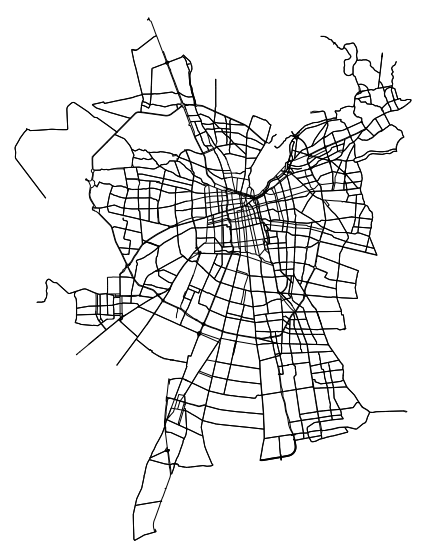

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

In [ ]:
red_ps = ox.graph.graph_from_polygon(poligono.geometry.item(), custom_filter = '["highway"~"primary|secondary"]')
ox.plot_graph(red_ps, figsize = (10,10), bgcolor = 'w', node_color = 'red', edge_color = 'black', node_alpha = 0)

In [ ]:
ox.save_graph_shapefile(red_ps)

/usr/local/lib/python3.7/dist-packages/osmnx/io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


<AxesSubplot:>

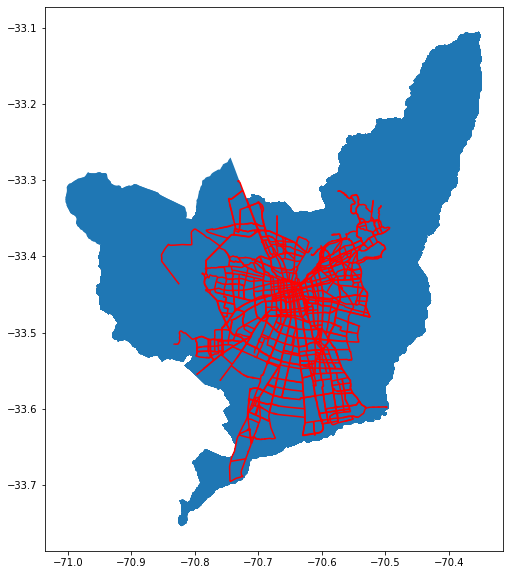

In [ ]:
df_nodos_ps = gpd.read_file('data/graph_shapefile/nodes.shp')
df_arcos_ps = gpd.read_file('data/graph_shapefile/edges.shp')
ax = dfparada_con_paradas.plot(figsize = (10,10))
df_arcos_ps.plot(ax = ax, figsize = (10,10), color = 'red')

In [ ]:
dfparada_con_paradas["centroides"] = dfparada_con_paradas.geometry.centroid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


<AxesSubplot:>

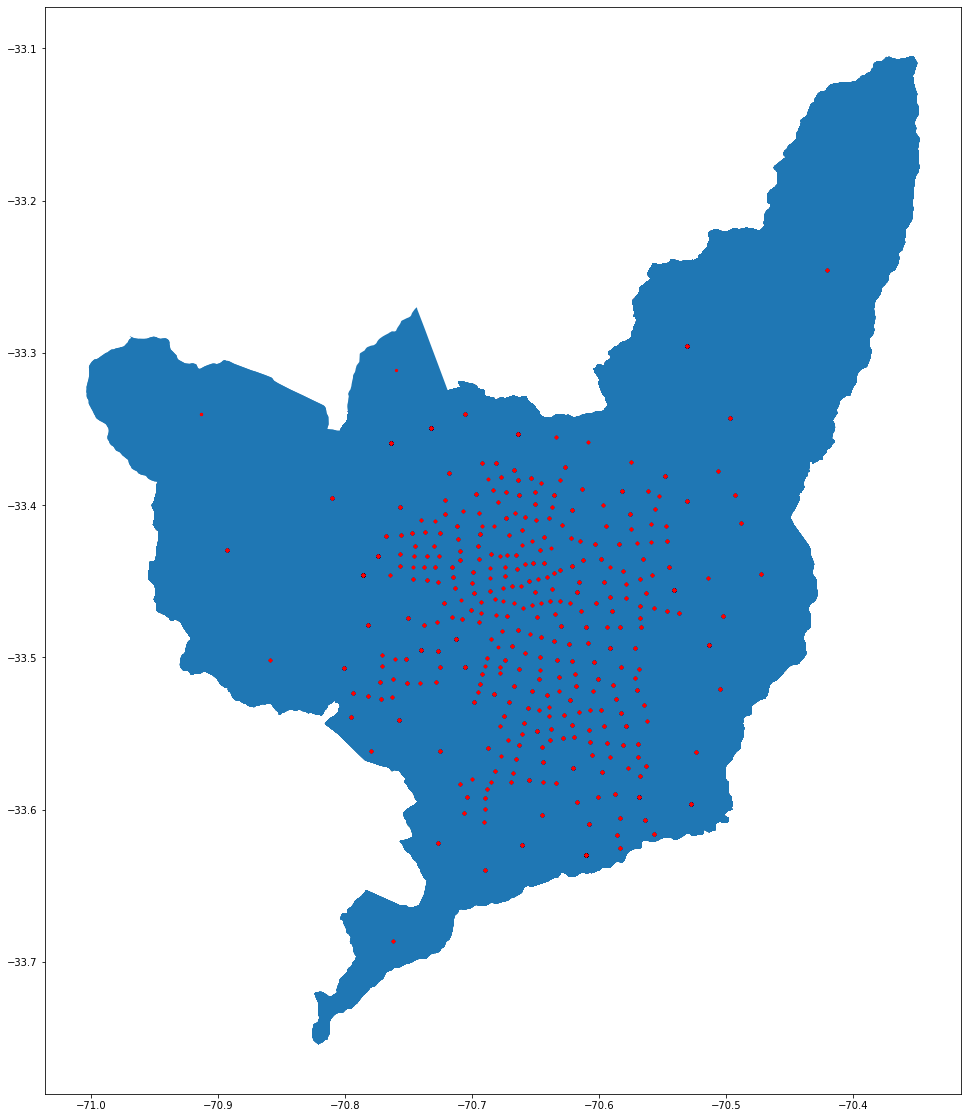

In [ ]:
ax = dfparada_con_paradas.plot(figsize = (20,20))
dfparada_con_paradas["centroides"].plot(ax = ax, figsize = (10,10), color = 'red', markersize = 5)

In [ ]:
dfparada_con_paradas["DINEROINVERTIDO"] = dfparada_con_paradas["N_PARADAS"] * dfparada_con_paradas["1_UF_M2"]

In [ ]:
dfparada_con_paradas.head()

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry,index_right,ID,CODINFRA,SIMT,COMUNA,EJE,DESDECRUCE,HACIACRUCE,NOMBRE_PAR,X,Y,N_ET,N_ZP,ZPHORARIO,FREPMA,PLAZASPMA,FREPTA,PLAZASPTA,NSERVICIOS,SERVICIOS,NUMSERVICIOS,SERVICIOS_SET,N_PARADAS,centroides,DINEROINVERTIDO
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((-70.64825 -33.43328, -70.64812 -33.4...",8616,698,E-20-53-OP-10,PA343,SANTIAGO,SANTIAGO,AVENIDA VICUÑA MACKENNA,IRENE MORALES,Parada 10 / Plaza Italia,347898.082928,6.299035e+06,ET03,NaN,None,35.0,4710.0,48.333333,6565.000000,10,106R;401R;405R;419R;421R;423R;481I;432NR;541NR...,96,"{406I, 504I, 210vR, 513I, 210R, 109NR, 422R, 4...",34,POINT (-70.64318 -33.43791),1057.06
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((-70.64825 -33.43328, -70.64812 -33.4...",8626,7136,E-20-53-OP-5,PA384,SANTIAGO,SANTIAGO,AVENIDA VICUÑA MACKENNA,IRENE MORALES,Parada 11 / Plaza Italia,347968.953641,6.299059e+06,ET03,NaN,None,20.5,2505.5,17.000000,1924.333333,5,412R;418R;D09NI;514R;515NR,96,"{406I, 504I, 210vR, 513I, 210R, 109NR, 422R, 4...",34,POINT (-70.64318 -33.43791),1057.06
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((-70.64825 -33.43328, -70.64812 -33.4...",8618,8475,E-20-192-OP-5,PA393,SANTIAGO,SANTIAGO,AVENIDA VICUÑA MACKENNA,IRENE MORALES,Parada 1 / Plaza Italia,347944.779694,6.299093e+06,ET03,NaN,None,41.0,5051.0,44.000000,5245.666667,6,504R;505R;508R;517R;502cR;B27R,96,"{406I, 504I, 210vR, 513I, 210R, 109NR, 422R, 4...",34,POINT (-70.64318 -33.43791),1057.06
3,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((-70.64825 -33.43328, -70.64812 -33.4...",8575,8469,T-20-192-PO-17,PA334,SANTIAGO,SANTIAGO,MAC IVER,MIRAFLORES,Merced / esq. Miraflores,346990.370000,6.298939e+06,0,NaN,None,52.0,6415.0,36.000000,4135.333333,6,504I;505I;508I;514I;517I;B02NI,96,"{406I, 504I, 210vR, 513I, 210R, 109NR, 422R, 4...",34,POINT (-70.64318 -33.43791),1057.06
4,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((-70.64825 -33.43328, -70.64812 -33.4...",8615,1099,E-20-53-OP-15,PA373,SANTIAGO,SANTIAGO,IRENE MORALES,NAMUR,Parada 9 / Plaza Italia,347824.037786,6.298998e+06,ET03,NaN,None,45.0,5185.0,53.666667,6205.000000,6,116I;303I;303R;406R;407R;426R,96,"{406I, 504I, 210vR, 513I, 210R, 109NR, 422R, 4...",34,POINT (-70.64318 -33.43791),1057.06


In [ ]:
max_dinero_invertido = dfparada_con_paradas["DINEROINVERTIDO"].max()
min_dinero_invertido = dfparada_con_paradas["DINEROINVERTIDO"].min()


In [ ]:
distrito_mas_invierte = dfparada_con_paradas.loc[dfparada_con_paradas["DINEROINVERTIDO"] == dfparada_con_paradas.max()["DINEROINVERTIDO"]]
distrito_menos_invierte = dfparada_con_paradas.loc[dfparada_con_paradas["DINEROINVERTIDO"] == dfparada_con_paradas.min()["DINEROINVERTIDO"]]

In [ ]:
display(distrito_mas_invierte.head(1))
display(distrito_menos_invierte.head(1))

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry,index_right,ID,CODINFRA,SIMT,COMUNA,EJE,DESDECRUCE,HACIACRUCE,NOMBRE_PAR,X,Y,N_ET,N_ZP,ZPHORARIO,FREPMA,PLAZASPMA,FREPTA,PLAZASPTA,NSERVICIOS,SERVICIOS,NUMSERVICIOS,SERVICIOS_SET,N_PARADAS,centroides,DINEROINVERTIDO
4099,Región Metropolitana De Santiago,131,Santiago,13114,Las Condes,Escuela Militar,1311401.0,4.0,90.0,664.0,2180.0,2852.0,5790.0,2480098.32,23.35,30.37,"POLYGON ((-70.56975 -33.39749, -70.56427 -33.4...",10673,6630,T-17-140-PO-15,PC161,LAS CONDES,LAS CONDES,PUERTA DEL SOL,LA MACARENA,Parada / Omnium,353286.7021,6301926.284,0,NaN,None,108.5,13232.5,74.666667,8680.0,11,401I;406I;407I;421I;426I;430I;401cI;406cI;C01I...,52,"{C01cI, 406I, 406R, 415eI, 411I, 219eR, C21NI,...",48,POINT (-70.57606 -33.40569),1457.76


,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry,index_right,ID,CODINFRA,SIMT,COMUNA,EJE,DESDECRUCE,HACIACRUCE,NOMBRE_PAR,X,Y,N_ET,N_ZP,ZPHORARIO,FREPMA,PLAZASPMA,FREPTA,PLAZASPTA,NSERVICIOS,SERVICIOS,NUMSERVICIOS,SERVICIOS_SET,N_PARADAS,centroides,DINEROINVERTIDO
10844,Región Metropolitana De Santiago,133,Chacabuco,13302,Lampa,Lipangue,1330205.0,138.0,209.0,67.0,22.0,0.0,436.0,125560641.0,0.03,0.33,"POLYGON ((-70.93881 -33.29206, -70.93870 -33.2...",2447,9270,L-10-12-5-PO,PJ837,PUDAHUEL,PUDAHUEL,-,SIMÓN BOLÍVAR,Camino Renca Lampa / esq. Simón Bolívar,328873.5062,6.304517e+06,0,NaN,None,3.5,343.0,3.333333,326.666667,1,J07eI,2,"{J07I, J07eI}",2,POINT (-70.91323 -33.34002),0.66


Largo de ruta: 31511.02000000001


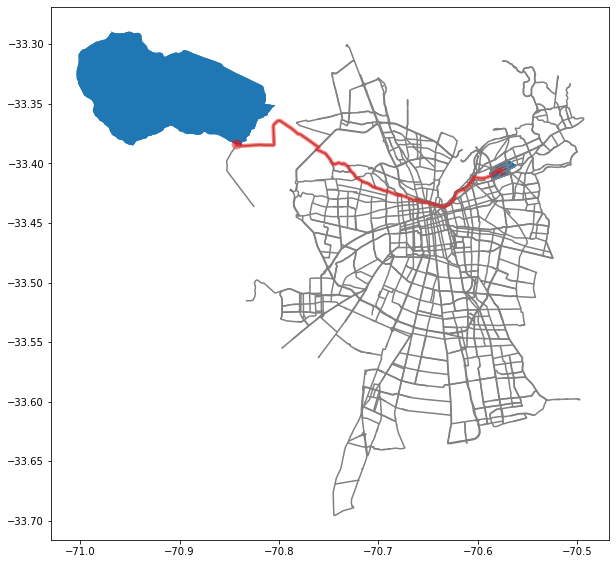

In [ ]:
x_orig, y_orig = *distrito_mas_invierte.iloc[0].centroides.xy,
x_dest, y_dest = *distrito_menos_invierte.iloc[0].centroides.xy,

orig_node = ox.distance.nearest_nodes(red_ps,x_orig[0],y_orig[0]) #-70.57606, -33.40569)
dest_node = ox.distance.nearest_nodes(red_ps, x_dest[0],y_dest[0]) #-70.91323, -33.34002)
route_ps = nx.shortest_path(red_ps, orig_node, dest_node, weight = 'length')
cost_ps = nx.shortest_path_length(red_ps, orig_node, dest_node, weight = 'length')
print(f"Largo de ruta: {cost_ps}")

cond1 = dfparada_con_paradas["DINEROINVERTIDO"] == max_dinero_invertido
cond2 = dfparada_con_paradas["DINEROINVERTIDO"] == min_dinero_invertido

ax = dfparada_con_paradas[(cond1 | cond2)].plot(figsize=(10, 10))
ax = df_arcos_ps.plot(ax=ax, figsize=(10, 10), color="grey")

fig, ax = ox.plot_graph_route(red_ps, route_ps, ax=ax, node_size = 0, figsize=(10,10))

# Misión 3

Supuesto: como quiero encontrar la ruta que pasa por tres distritos, me quedo sólo con los distritos que tengan paradas.

In [ ]:
nivel_e = dfparada_con_paradas["E"]
nivel_d = dfparada_con_paradas["D"]
nivel_c3 = dfparada_con_paradas["C3"]
nivel_c2 = dfparada_con_paradas["C2"]
nivel_abc1 = dfparada_con_paradas["ABC1"]

MONTO_E = 1
MONTO_D = 2
MONTO_C3 = 3
MONTO_C2 = 4
MONTO_ABC1 = 10

dfparada_con_paradas["NIVEL_SOC_PROMEDIO"] = (nivel_e * MONTO_E + nivel_d * MONTO_D + nivel_c3 * MONTO_C3 + nivel_c2 * MONTO_C2 + nivel_abc1 * MONTO_ABC1) / (nivel_e + nivel_d + nivel_c3 + nivel_c2 + nivel_abc1)
# dfparada_con_paradas["NIVEL_SOC_PROMEDIO"] = (nivel_e + nivel_d + nivel_c3 + nivel_c2 + nivel_abc1) / 5

In [ ]:
# dfparada_con_paradas["STD_NIV_SOC"] = np.std([nivel_e, nivel_d, nivel_c3, nivel_c2, nivel_abc1])
for i, z in enumerate(zip(nivel_e, nivel_d, nivel_c3, nivel_c2, nivel_abc1)):
    dfparada_con_paradas.at[i, "STD_NIV_SOC"] = np.std(z)

In [ ]:
dfparada_con_paradas.head()

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry,index_right,ID,CODINFRA,SIMT,COMUNA,EJE,DESDECRUCE,HACIACRUCE,NOMBRE_PAR,X,Y,N_ET,N_ZP,ZPHORARIO,FREPMA,PLAZASPMA,FREPTA,PLAZASPTA,NSERVICIOS,SERVICIOS,NUMSERVICIOS,SERVICIOS_SET,N_PARADAS,centroides,DINEROINVERTIDO,NIVEL_SOC_PROMEDIO,STD_NIV_SOC
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((-70.64825 -33.43328, -70.64812 -33.4...",8616,698,E-20-53-OP-10,PA343,SANTIAGO,SANTIAGO,AVENIDA VICUÑA MACKENNA,IRENE MORALES,Parada 10 / Plaza Italia,347898.082928,6.299035e+06,ET03,NaN,None,35.0,4710.0,48.333333,6565.000000,10,106R;401R;405R;419R;421R;423R;481I;432NR;541NR...,96,"{406I, 504I, 210vR, 513I, 210R, 109NR, 422R, 4...",34,POINT (-70.64318 -33.43791),1057.06,4.023447,531.637696
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((-70.64825 -33.43328, -70.64812 -33.4...",8626,7136,E-20-53-OP-5,PA384,SANTIAGO,SANTIAGO,AVENIDA VICUÑA MACKENNA,IRENE MORALES,Parada 11 / Plaza Italia,347968.953641,6.299059e+06,ET03,NaN,None,20.5,2505.5,17.000000,1924.333333,5,412R;418R;D09NI;514R;515NR,96,"{406I, 504I, 210vR, 513I, 210R, 109NR, 422R, 4...",34,POINT (-70.64318 -33.43791),1057.06,4.023447,531.637696
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((-70.64825 -33.43328, -70.64812 -33.4...",8618,8475,E-20-192-OP-5,PA393,SANTIAGO,SANTIAGO,AVENIDA VICUÑA MACKENNA,IRENE MORALES,Parada 1 / Plaza Italia,347944.779694,6.299093e+06,ET03,NaN,None,41.0,5051.0,44.000000,5245.666667,6,504R;505R;508R;517R;502cR;B27R,96,"{406I, 504I, 210vR, 513I, 210R, 109NR, 422R, 4...",34,POINT (-70.64318 -33.43791),1057.06,4.023447,531.637696
3,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((-70.64825 -33.43328, -70.64812 -33.4...",8575,8469,T-20-192-PO-17,PA334,SANTIAGO,SANTIAGO,MAC IVER,MIRAFLORES,Merced / esq. Miraflores,346990.370000,6.298939e+06,0,NaN,None,52.0,6415.0,36.000000,4135.333333,6,504I;505I;508I;514I;517I;B02NI,96,"{406I, 504I, 210vR, 513I, 210R, 109NR, 422R, 4...",34,POINT (-70.64318 -33.43791),1057.06,4.023447,531.637696
4,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((-70.64825 -33.43328, -70.64812 -33.4...",8615,1099,E-20-53-OP-15,PA373,SANTIAGO,SANTIAGO,IRENE MORALES,NAMUR,Parada 9 / Plaza Italia,347824.037786,6.298998e+06,ET03,NaN,None,45.0,5185.0,53.666667,6205.000000,6,116I;303I;303R;406R;407R;426R,96,"{406I, 504I, 210vR, 513I, 210R, 109NR, 422R, 4...",34,POINT (-70.64318 -33.43791),1057.06,4.023447,531.637696


In [ ]:
max_soc_avg = dfparada_con_paradas["NIVEL_SOC_PROMEDIO"].max()
min_soc_avg = dfparada_con_paradas["NIVEL_SOC_PROMEDIO"].min()
min_std_soc = dfparada_con_paradas["STD_NIV_SOC"].min()

In [ ]:
distrito_max_soc = dfparada_con_paradas[dfparada_con_paradas["NIVEL_SOC_PROMEDIO"] == max_soc_avg]
distrito_min_soc = dfparada_con_paradas[dfparada_con_paradas["NIVEL_SOC_PROMEDIO"] == min_soc_avg]
distrito_min_std = dfparada_con_paradas[dfparada_con_paradas["STD_NIV_SOC"] == min_std_soc]

display(dfparada_con_paradas[dfparada_con_paradas["NIVEL_SOC_PROMEDIO"] == max_soc_avg].head(1))
display(dfparada_con_paradas[dfparada_con_paradas["NIVEL_SOC_PROMEDIO"] == min_soc_avg].head(1))
display(dfparada_con_paradas[dfparada_con_paradas["STD_NIV_SOC"] == min_std_soc].head(1))

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry,index_right,ID,CODINFRA,SIMT,COMUNA,EJE,DESDECRUCE,HACIACRUCE,NOMBRE_PAR,X,Y,N_ET,N_ZP,ZPHORARIO,FREPMA,PLAZASPMA,FREPTA,PLAZASPTA,NSERVICIOS,SERVICIOS,NUMSERVICIOS,SERVICIOS_SET,N_PARADAS,centroides,DINEROINVERTIDO,NIVEL_SOC_PROMEDIO,STD_NIV_SOC
3980,Región Metropolitana De Santiago,131,Santiago,13113,La Reina,La Reina,1311306.0,4.0,49.0,183.0,492.0,1025.0,1753.0,9710979.42,1.81,2.25,"POLYGON ((-70.53462 -33.44134, -70.53487 -33.4...",10185,7849,L-19-22-15-SN,PD1005,LA REINA,LA REINA,HELSBY,VALENZUELA PUELMA,Av. Padre Hurtado / esq. V. Puelma,357102.9115,6.299415e+06,0,NaN,None,5.5,499.5,6.666667,585.0,1,D08I,9,"{D02I, D18R, 422I, D08I, 403I, D02R, D18I, D08...",19,POINT (-70.51428 -33.44783),42.75,7.341129,377.887073


,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry,index_right,ID,CODINFRA,SIMT,COMUNA,EJE,DESDECRUCE,HACIACRUCE,NOMBRE_PAR,X,Y,N_ET,N_ZP,ZPHORARIO,FREPMA,PLAZASPMA,FREPTA,PLAZASPTA,NSERVICIOS,SERVICIOS,NUMSERVICIOS,SERVICIOS_SET,N_PARADAS,centroides,DINEROINVERTIDO,NIVEL_SOC_PROMEDIO,STD_NIV_SOC
10844,Región Metropolitana De Santiago,133,Chacabuco,13302,Lampa,Lipangue,1330205.0,138.0,209.0,67.0,22.0,0.0,436.0,125560641.0,0.03,0.33,"POLYGON ((-70.93881 -33.29206, -70.93870 -33.2...",2447,9270,L-10-12-5-PO,PJ837,PUDAHUEL,PUDAHUEL,-,SIMÓN BOLÍVAR,Camino Renca Lampa / esq. Simón Bolívar,328873.5062,6.304517e+06,0,NaN,None,3.5,343.0,3.333333,326.666667,1,J07eI,2,"{J07I, J07eI}",2,POINT (-70.91323 -33.34002),0.66,1.938073,77.043884


,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry,index_right,ID,CODINFRA,SIMT,COMUNA,EJE,DESDECRUCE,HACIACRUCE,NOMBRE_PAR,X,Y,N_ET,N_ZP,ZPHORARIO,FREPMA,PLAZASPMA,FREPTA,PLAZASPTA,NSERVICIOS,SERVICIOS,NUMSERVICIOS,SERVICIOS_SET,N_PARADAS,centroides,DINEROINVERTIDO,NIVEL_SOC_PROMEDIO,STD_NIV_SOC
585,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Quinta Normal,1310129.0,13.0,58.0,81.0,41.0,5.0,198.0,732908.67,2.7,5.61,"POLYGON ((-70.69201 -33.43955, -70.68494 -33.4...",5142,6291,T-7-56-PO-15,PI86,ESTACIÓN CENTRAL,ESTACIÓN CENTRAL,LAS ENCINAS,LAS SOPHORAS,Parada / Museo Artequín,343427.02,6298199.77,0,NaN,None,24.5,2455.0,20.666667,2010.0,3,I10I;514I;J19I,12,"{J19I, 120I, 514R, J16I, 105I, 109R, 407I, J19...",9,POINT (-70.68581 -33.44135),50.49,2.959596,28.139652


In [ ]:
x_max_soc, y_max_soc = *distrito_max_soc.iloc[0].centroides.xy,
x_min_soc, y_min_soc = *distrito_min_soc.iloc[0].centroides.xy,
x_min_std, y_min_std = *distrito_min_std.iloc[0].centroides.xy,
max_soc_point = ox.distance.nearest_nodes(red_ps, x_max_soc[0], y_max_soc[0])
min_soc_point = ox.distance.nearest_nodes(red_ps, x_min_soc[0], y_min_soc[0])
min_std_soc_point = ox.distance.nearest_nodes(red_ps, x_min_std[0], y_min_std[0])

In [ ]:
def get_path_and_distance(red_ps, origin_point, destiny_point):
    route = nx.shortest_path(red_ps, origin_point, destiny_point, weight="lenght")
    distance = nx.shortest_path_length(red_ps, origin_point, destiny_point, weight="length")
    return route, distance


In [ ]:
routes_and_dists = [
    get_path_and_distance(red_ps, max_soc_point, min_soc_point),
    get_path_and_distance(red_ps, max_soc_point, min_std_soc_point),
    get_path_and_distance(red_ps, min_std_soc_point, min_soc_point),
]

In [ ]:
routes_and_dists.sort(key=lambda x: x[1])
print(f"Largo de ruta: {routes_and_dists[0][1] + routes_and_dists[1][1]}")


Largo de ruta: 38784.263999999996


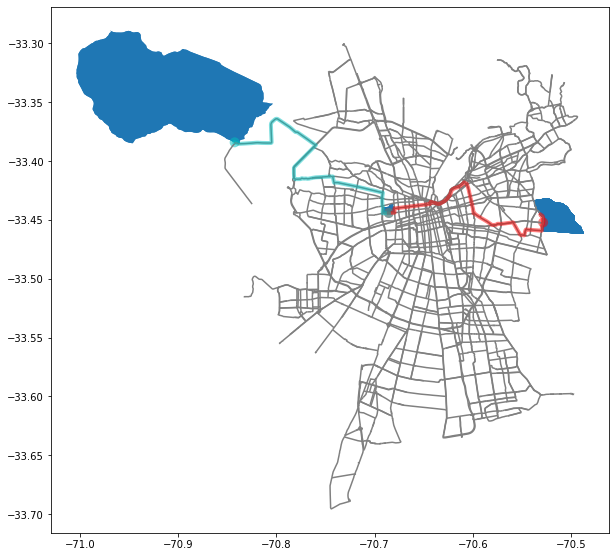

In [ ]:
cond1 = dfparada_con_paradas["NIVEL_SOC_PROMEDIO"] == max_soc_avg
cond2 = dfparada_con_paradas["NIVEL_SOC_PROMEDIO"] == min_soc_avg
cond3 = dfparada_con_paradas["STD_NIV_SOC"] == min_std_soc

ax = dfparada_con_paradas[(cond1 | cond2 | cond3)].plot(figsize=(10, 10))
ax = df_arcos_ps.plot(ax=ax, figsize=(10, 10), color="grey")

routes = [routes_and_dists[0][0], routes_and_dists[1][0]]
fig, ax = ox.plot_graph_routes(red_ps, routes, ax=ax, node_size = 0, figsize=(10,10), route_colors=["r", "c"])